In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
from scipy import optimize
from datetime import date, timedelta
import random
from datetime import datetime

state_dic={'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Federal District',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}
population={'AC': 894470,
 'AL': 3351543,
 'AP': 861773,
 'AM': 4207714,
 'BA': 14930634,
 'CE': 9187103,
 'DF': 3005149,
 'ES': 4064052,
 'GO': 7113540,
 'MA': 7114598,
 'MT': 2809394,
 'MS': 2809394,
 'MG': 21292666,
 'PA': 9860745,
 'PB': 7036277,
 'PR': 11516840,
 'PE': 9616621,
 'PI': 3281480,
 'RJ': 17366189,
 'RN': 3534165,
 'RS': 11422973,
 'RO': 1796460,
 'RR': 631181,
 'SC': 7252502,
 'SP': 46289333,
 'SE': 2318822,
 'TO': 1590248}


def a(t,a0,a1,a2,a3,t1,t2,t3):
    if t<=t1:
        a=a0
    elif t2>=t>t1:
        a=a1
    elif t3>=t>t2:
        a=a2
    elif t>t3:
        a=a3
    return a
def b(t,b0,b1,b2,b3,t1,t2,t3):
    if t<=t1:
        b=b0
    elif t2>=t>t1:
        b=b1
    elif t3>=t>t2:
        b=b2
    elif t>t3:
        b=b3
    return b


def SIR(f,t,params):
    b0,b1,b2,b3,a0,a1,a2,a3,t1,t2,t3,g = params
    fb = b(t,b0,b1,b2,b3,t1,t2,t3)
    fa = a(t,a0,a1,a2,a3,t1,t2,t3)
    #variables
    S = f[0]
    I = f[1]
    R = f[2]
    Nc = f[3]
    #equations inclunding epidemic curve
    dS_dt = -fb*(S/N)*I*(S/N)**(1/fa)
    dI_dt = fb*(S/N)*I*(S/N)**(1/fa) - g*I 
    dR_dt = g*I

    
    #new cases rate
    dNc_dt = fb*(S/N)*I*(S/N)**(1/fa)
    
    return [dS_dt,dI_dt,dR_dt,dNc_dt]

In [4]:
s = 'BA'
data_frame=pd.read_csv('best_fits\\Best_Fits_'+s+'.csv')

data_frame
a0=data_frame.a0.values
a1=data_frame.a1.values
a2=data_frame.a2.values
a3=data_frame.a3.values
b0=data_frame.b0.values
b1=data_frame.b1.values
b2=data_frame.b2.values
b3=data_frame.b3.values
t1=data_frame.t1.values
t2=data_frame.t2.values
t3=data_frame.t3.values
g=data_frame.g.values
i0=data_frame.i0.values
rr=data_frame.rr.values

a0=a0[0]
a1=a1[0]
a2=a2[0]
a3=a3[0]
b0=b0[0]
b1=b1[0]
b2=b2[0]
b3=b3[0]
t1=t1[0]
t2=t2[0]
t3=t3[0]
g=g[0]
i0=i0[0]
rr=rr[0]

In [5]:
#Define the state and the type of fit: (estado,capital,interior)

file='estado'

N=population[s]

#Read csv
df=pd.read_csv('Data/'+s+"/"+file+".csv")

#Limit the date of the Fit
df = df.query("date <= '2020-09-30'")

#Read the file
dates=df.date.values
data=df.cases.values
new_cases = [0]*len(data)
for x in range(len(data)):
    if x==0:
        new_cases[x] = data[0]
    else:
        new_cases[x] = data[x]-data[x-1]
ts0=np.arange(len(data))
q0 = [N-i0,i0,0,0]

#parameters
parode =b0,b1,b2,b3,a0,a1,a2,a3,t1,t2,t3,g

#calls integrator
qs = odeint(SIR,q0, ts0,args=(parode,),mxstep=1000000)

qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
print(ts0)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208]


In [20]:
err = (qi-data)*(qi+1)**(-1/2)
len(err)
erro = 0
for i in range(len(err)):
    erro += abs(err[i])
print(erro/len(data))

5.908209532680167


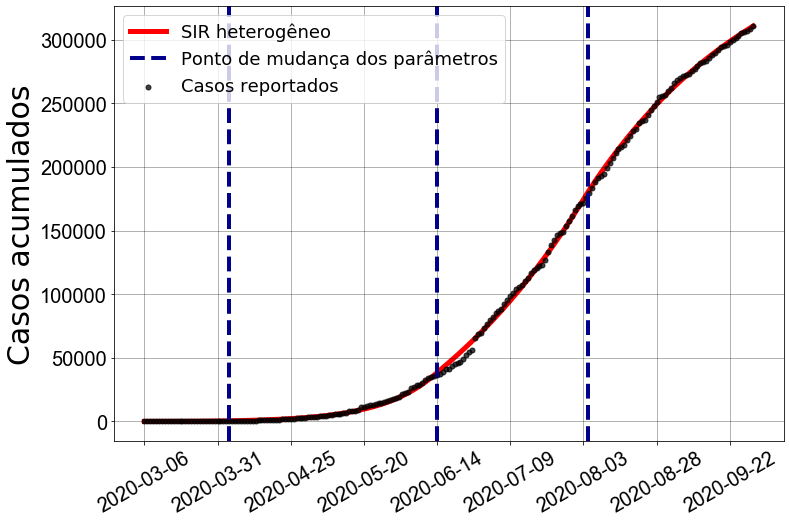

In [12]:

#################################CRIAÇÃO DO PLOT#################################

#rp = str(subn)

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)



ax.scatter(dates,data, s=25,color='k',zorder=2,alpha=0.75,label='Casos reportados') #culmulative cases

#Plot the fitted function as a line.

ax.plot(dates,qi,color='r',zorder=1, linewidth=5,label='SIR heterogêneo') #culmulativecases



ax.axvline(t1, 0, 600,c='darkblue',linewidth=4,linestyle='--',label='Ponto de mudança dos parâmetros')
ax.axvline(t2, 0, 600,c='darkblue',linewidth=4,linestyle='--')
ax.axvline(t3, 0, 600,c='darkblue',linewidth=4,linestyle='--')




#Set the labels
ax.set_ylabel('Casos acumulados',fontsize=30)

#Set the title
#ax.set_title('Covid-19 '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=20)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)

#label
ax.legend(loc='upper left',fontsize=18)

#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

    
    
    
#ax.set_ylim([0,350000])    
#Show Graph       
pl.show()

#Save Fig
#fig.savefig(r"Fit_hete\\NC_SIR-hete_betavar_3.png",bbox_inches='tight') #novos casos
fig.savefig(r"Fit_hete\\"+s+"\\SIR-hete_betavar_3.png",bbox_inches='tight')

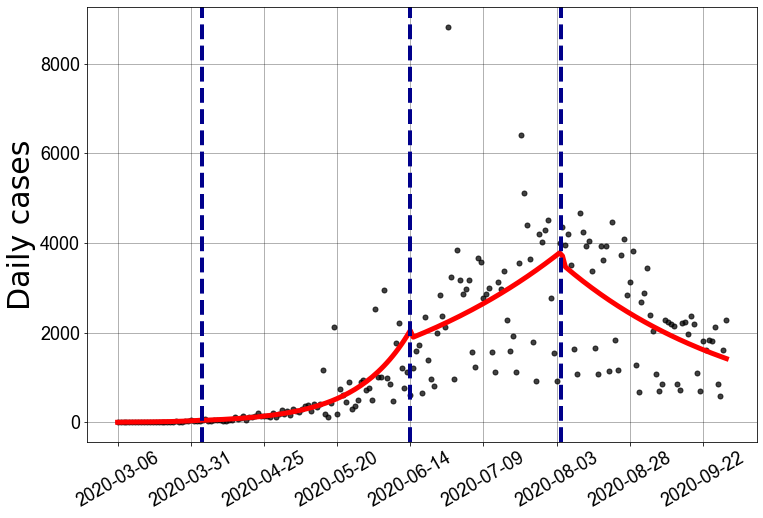

In [13]:

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

#Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
ax.scatter(dates,new_cases, s=25,color='black',alpha=0.75,zorder=1,label='Reported data') #newcases


#Plot the fitted function as a line.
ax.plot(dates,ni,color='red',zorder=2, linewidth=5,label='Fitted function') #newcases


ax.axvline(t1, 0, 600,c='darkblue',linewidth=4,linestyle='--',label='Intervention')
ax.axvline(t2, 0, 600,c='darkblue',linewidth=4,linestyle='--')
ax.axvline(t3, 0, 600,c='darkblue',linewidth=4,linestyle='--')





#Set the labels
ax.set_ylabel('Daily cases',fontsize=30)

#Set the title
#ax.set_title('Covid-19 '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)

#label
#ax.legend(loc='upper right',fontsize=20)

#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       
pl.show()

#Save Fig
fig.savefig(r"Fit_hete\\"+s+"\\NC_SIR-hete_betavar_3.png",bbox_inches='tight') #novos casos
#fig.savefig(r"Fit_hete\\SIR-hete_betavar_3.png",bbox_inches='tight')



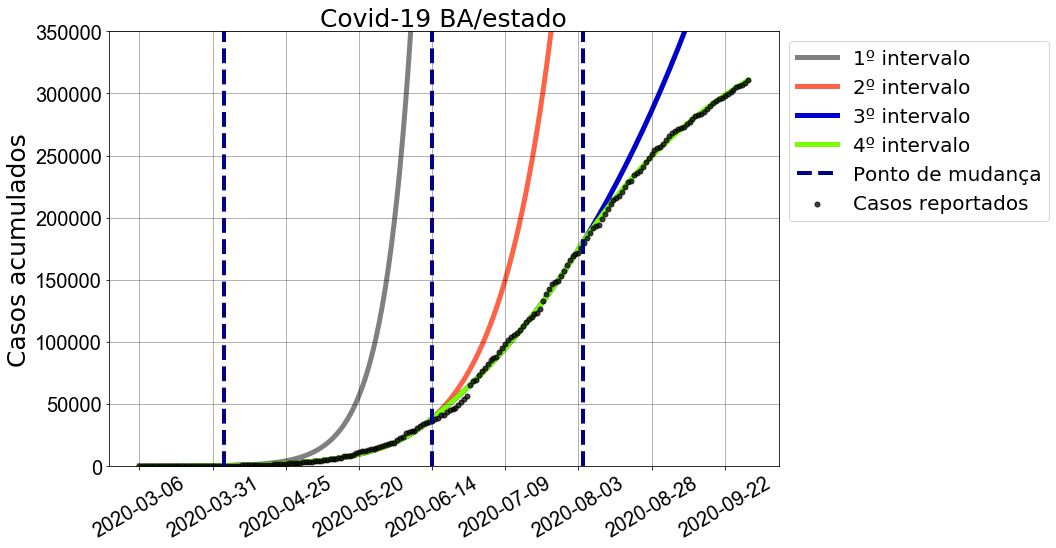

In [19]:

#################################CRIAÇÃO DO PLOT#################################

#rp = str(subn)

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)



ax.scatter(dates,data, s=25,color='k',zorder=2,alpha=0.75,label='Casos reportados') #culmulative cases

#Plot the fitted function as a line.
parode1 = b0,b0,b0,b0,a0,a0,a0,a0,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode1,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,qi,color='gray',zorder=1, linewidth=5,label='1º intervalo') #culmulativecases

parode2 = b0,b1,b1,b1,a0,a1,a1,a1,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode2,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,qi,color='tomato',zorder=1, linewidth=5,label='2º intervalo') #culmulativecases

parode3 = b0,b1,b2,b2,a0,a1,a2,a2,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode3,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,qi,color='mediumblue',zorder=1, linewidth=5,label='3º intervalo') #culmulativecases

parode4 = b0,b1,b2,b3,a0,a1,a2,a3,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode4,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,qi,color='lawngreen',zorder=1, linewidth=5,label='4º intervalo') #culmulativecases



ax.axvline(t1, 0, 600,c='darkblue',linewidth=4,linestyle='--',label='Ponto de mudança')
ax.axvline(t2, 0, 600,c='darkblue',linewidth=4,linestyle='--')
ax.axvline(t3, 0, 600,c='darkblue',linewidth=4,linestyle='--')




#Set the labels
ax.set_ylabel('Casos acumulados',fontsize=25)

#Set the title
ax.set_title('Covid-19 '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=20)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)

#label
ax.legend(bbox_to_anchor=(1, 1),fontsize=20)

#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

    
    
    
ax.set_ylim([0,350000])    
#Show Graph       
pl.show()

#Save Fig
fig.savefig(r"Fit_hete\\"+s+"\\SIR-hete_betavar_3_FITCONTINUADO.png",bbox_inches='tight')

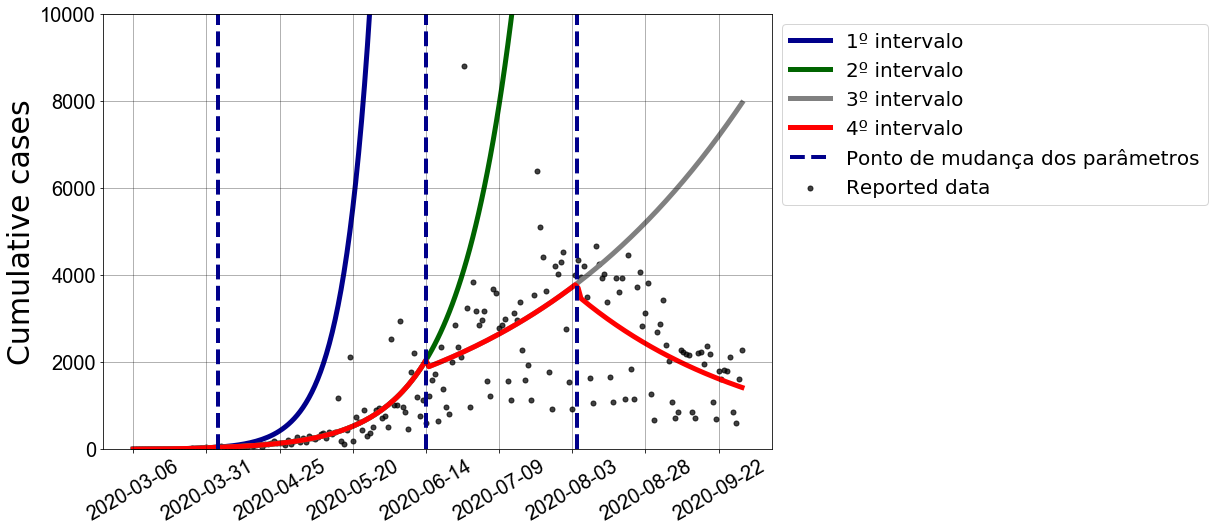

In [10]:

#################################CRIAÇÃO DO PLOT#################################

#rp = str(subn)

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)



ax.scatter(dates,new_cases, s=25,color='black',alpha=0.75,zorder=1,label='Reported data') #newcases

#Plot the fitted function as a line.
parode1 = b0,b0,b0,b0,a0,a0,a0,a0,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode1,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,ni,color='darkblue',zorder=1, linewidth=5,label='1º intervalo') #culmulativecases

parode2 = b0,b1,b1,b1,a0,a1,a1,a1,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode2,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,ni,color='darkgreen',zorder=1, linewidth=5,label='2º intervalo') #culmulativecases

parode3 = b0,b1,b2,b2,a0,a1,a2,a2,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode3,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,ni,color='gray',zorder=1, linewidth=5,label='3º intervalo') #culmulativecases

parode4 = b0,b1,b2,b3,a0,a1,a2,a3,t1,t2,t3,g
qs = odeint(SIR,q0, ts0,args=(parode4,),mxstep=1000000)
qi = rr*qs[:,-1]
ni= rr*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1])))
ax.plot(dates,ni,color='r',zorder=1, linewidth=5,label='4º intervalo') #culmulativecases



ax.axvline(t1, 0, 600,c='darkblue',linewidth=4,linestyle='--',label='Ponto de mudança dos parâmetros')
ax.axvline(t2, 0, 600,c='darkblue',linewidth=4,linestyle='--')
ax.axvline(t3, 0, 600,c='darkblue',linewidth=4,linestyle='--')




#Set the labels
ax.set_ylabel('Cumulative cases',fontsize=30)

#Set the title
#ax.set_title('Covid-19 '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=20)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)

#label
ax.legend(bbox_to_anchor=(1, 1),fontsize=20)

#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

    
    
    
ax.set_ylim([0,10000])    
#Show Graph       
pl.show()

#Save Fig
fig.savefig(r"Fit_hete\\NC_SIR-hete_betavar_3_FITCONTINUADO.png",bbox_inches='tight') #novos casos